## Delivery:

Create, in your library/module, a protected function called 'f_protected' that creates a lambda function. The lambda function must receive a param 'x' and return a boolean True if 'x' is higher than 5.  Also, 'f_protected' must create a list ('l1') with 'list comprehesion' that generates a list from 0 to 15. Finally, 'f_protected' must return 'l1' filtered (with function 'filter') using the lambda function.

After that, create a decorator called "prepost". The decorator must receive an *args and a **kwargs argument. 

If in 'kwargs' there is a key called "url", then it must do the next:

    1. Open with pandas the url as 'csv'. The variable is called 'df'.
    2. Do what '_f_protected' does (the function wrapped with the decorator). Simply, call the function.
    3. Plot histograms of each column in 'df'.

----------

The url is:

http://winterolympicsmedals.com/medals.csv

Finally, use the decorator as follow and call the function:

In [ ]:
from functools import wraps
from datetime import datetime
import math
import time

def decorator_v2(timed):
    def real_decorator(function):
        @wraps(function)
        def wrapper(*args, **kwargs):
            if timed:
                begin = time.time() 
                begin_2 = datetime.now()
            retval = function(*args, **kwargs)
            if timed:
                end = time.time()
                end_2 = datetime.now()
                print("--------------")
                print("With time:")
                print("Total time: ", end - begin, " seconds") 
                print("--------------")
                print("With datetime:")
                print("Total datetime: ", end_2 - begin_2, " seconds") 
            return retval
        return wrapper
    return real_decorator

@decorator_v2(timed=True)
def fact(a):
    return math.factorial(a)

fact(10000)

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

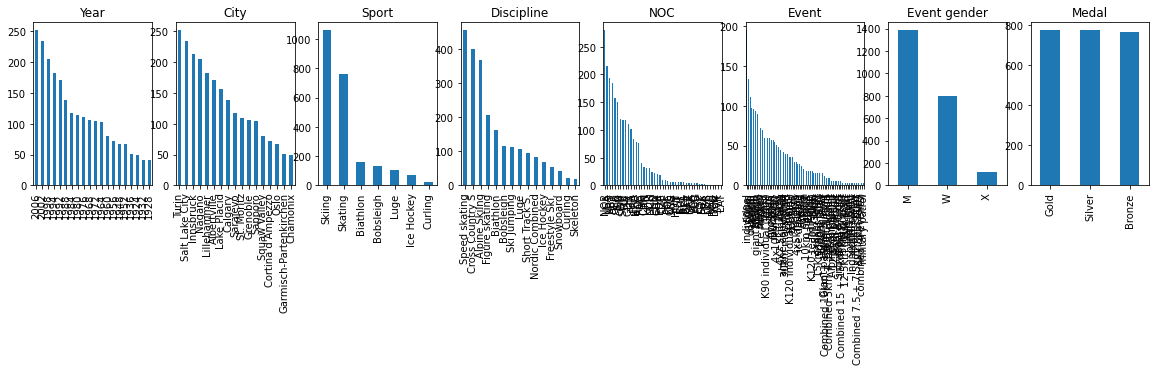

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import wraps

key_url = "http://winterolympicsmedals.com/medals.csv"

def prepost(*args, **kwargs):
    def real_decorator(function):
        @wraps(function)
        def wrapper(*a, **k):
            #your prepost decorator code...
            if "url" in kwargs.keys():
                df = pd.read_csv(kwargs["url"])
                retval = function(*a, **k)
                categorical_features = df.columns
                fig, ax = plt.subplots(1, len(categorical_features),figsize = (20,3))
                for i, categorical_feature in enumerate(df[categorical_features]):
                    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
                fig.show()
                return retval
        return wrapper
    return real_decorator

@prepost(url=key_url)   
def _f_protected():
    #your _f_protected_code...
    lam = lambda x: True if x > 5 else False 
    l1 = [e for e in range(1,16)]
    result = filter(lam, l1)
    return list(result)

_f_protected()

In [9]:
import pandas as pd

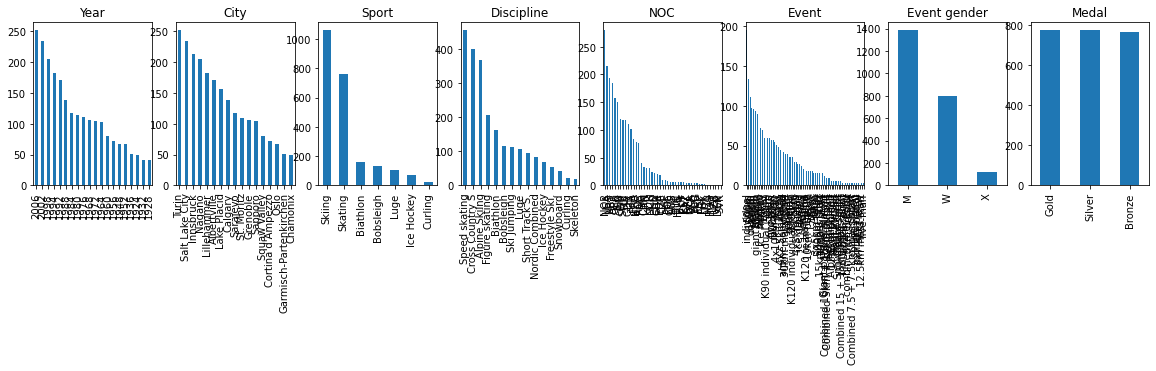

In [49]:
prepost(url=key_url)

In [ ]:
# importing libraries 
import time 
import math 
  
def calculate_time(func): 
    def inner1(*args, **kwargs):
        print("Anterior") 
        begin = time.time() 
        func(*args, **kwargs) 
        end = time.time() 
        print("Total time", end - begin, "seconds") 
    return inner1 
  
@calculate_time
def factorial(num): 
    #time.sleep(2) 
    print(math.factorial(num)) 
  
factorial(5)

In [25]:
def _f_protected():
    #your _f_protected_code...
    lam = lambda x: True if x > 5 else False 
    l1 = [e for e in range(1,16)]
    result = filter(lam, l1)
    return list(result)

_f_protected()

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [30]:
df = pd.read_csv("http://winterolympicsmedals.com/medals.csv")

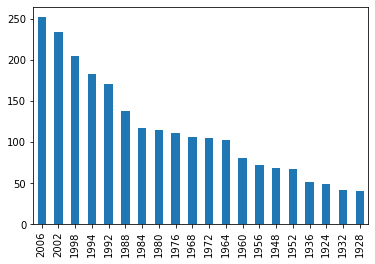

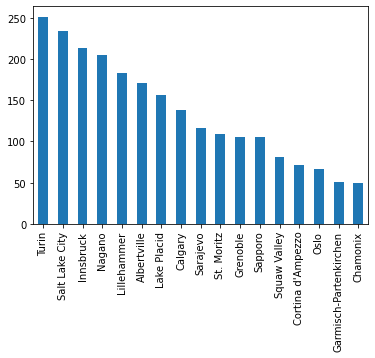

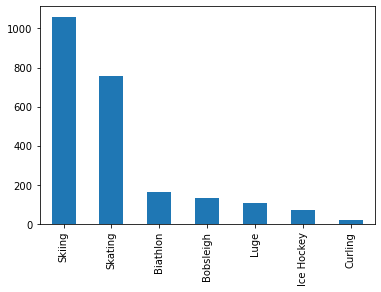

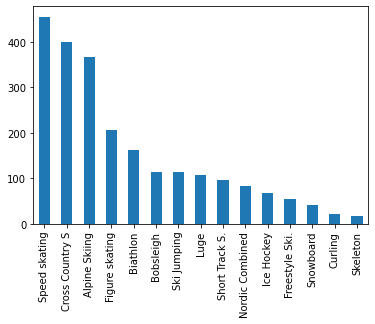

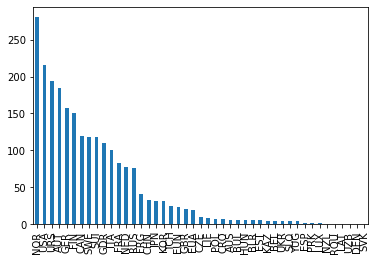

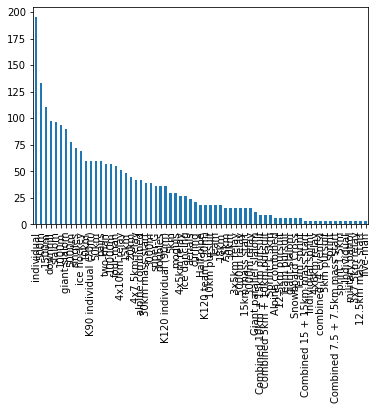

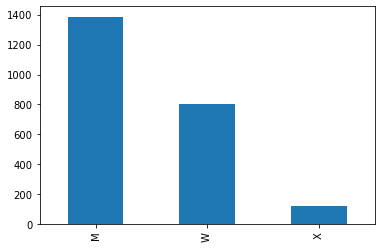

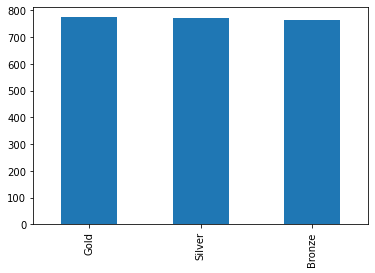

In [39]:
for e in df.columns: 
    plt.show(df[e].value_counts().plot(kind='bar'))

In [38]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'NOC', 'Event', 'Event gender',
       'Medal'],
      dtype='object')

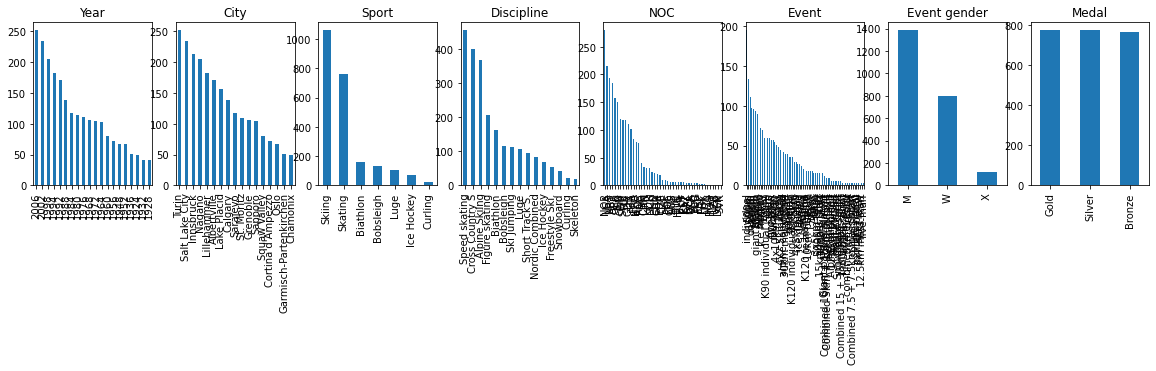

In [51]:
categorical_features = df.columns
fig, ax = plt.subplots(1, len(categorical_features), figsize = (20,3))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

In [7]:
from functools import wraps

def pepe_el_decorador(*args, **kwargs):
    def alter_ego_de_pepe(cualquier_funcion_que_pepe_decore):
        @wraps(cualquier_funcion_que_pepe_decore)
        def wrapper(*a, **k):
            if args:
                print("args:",args)
            if kwargs:
                print("kwargs:",kwargs)
            if a:
                print("a:",a)
            if k:
                print("k:",k)
            return ("esto es lo que devuelve 'wrapper':",cualquier_funcion_que_pepe_decore(*a,**k))
        print(wrapper, "\nlo devuelve la función alter_ego_de_pepe")
        return wrapper
    return alter_ego_de_pepe


@pepe_el_decorador(808080, quiwars="este es el valor de kwargs del decorador")
def funcion_decorada_por_pepe(ar, kw):
    print("este es el parámetro 'ar' de 'funcion_decorada_por_pepe:", ar)
    print("este es el parámetro 'kw':",kw)
    return "Esto es lo que devuelve la función decorada"

funcion_decorada_por_pepe("en wrapper soy '*a'", kw = "en wrapper soy '**k'")

<function funcion_decorada_por_pepe at 0x00B00A48> 
lo devuelve la función alter_ego_de_pepe
args: (808080,)
kwargs: {'quiwars': 'este es el valor de kwargs del decorador'}
a: ("en wrapper soy '*a'",)
k: {'kw': "en wrapper soy '**k'"}
este es el parámetro 'ar' de 'funcion_decorada_por_pepe: en wrapper soy '*a'
este es el parámetro 'kw': en wrapper soy '**k'


("esto es lo que devuelve 'wrapper':",
 'Esto es lo que devuelve la función decorada')